In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [77]:
df = pd.read_csv('project1/All_Movies_Working.csv')
years = df['release_year'].unique()
years_s = years.astype(str)
df.head()

,Title,Metascore,Rated,Runtime,Released,Genre,Box Office,imdb_rating,imdb_votes,imdb_source,imdb_score,rotten_source,rotten_score,metacrit_source,metacrit_score,release_month,release_year
0,Beowulf,59.0,PG-13,115 min,16 Nov 2007,"Animation, Action, Adventure, Fantasy",82200000.0,6.2,"155,920",Internet Movie Database,6.2,Rotten Tomatoes,7.1,Metacritic,5.9,11,2007
1,But I'm a Cheerleader,39.0,R,85 min,11 Aug 2000,"Comedy, Drama, Romance",175182.0,6.6,"23,614",Internet Movie Database,6.6,Rotten Tomatoes,3.9,Metacritic,3.9,8,2000
2,Flawless,57.0,PG-13,108 min,28 Mar 2008,"Crime, Drama, Thriller",1146525.0,6.8,"21,901",Internet Movie Database,6.8,Rotten Tomatoes,5.5,Metacritic,5.7,3,2008
3,Gloria,83.0,R,110 min,09 May 2013,"Comedy, Drama, Romance",1587655.0,6.8,"7,804",Internet Movie Database,6.8,Rotten Tomatoes,9.9,Metacritic,8.3,5,2013
4,Life,54.0,R,104 min,24 Mar 2017,"Horror, Sci-Fi, Thriller",30180466.0,6.6,"185,922",Internet Movie Database,6.6,Rotten Tomatoes,6.8,Metacritic,5.4,3,2017


In [78]:
rdf = df.loc[(df['Rated'] != 'Not Rated')&(df['Rated'] != 'NC-17')]

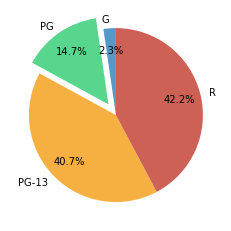

In [79]:
grp_pie_count = rdf.groupby(['Rated'])['Box Office'].count()
count_sum = grp_pie_count.sum()
count_per = (grp_pie_count/count_sum)*100
labels = count_per.index
colors = ['#5499C7','#58D68D','#F5B041','#CD6155']
explode = (0, 0.15, 0, 0)
plt.pie(count_per, labels = labels, startangle=90, autopct='%1.1f%%', colors = colors, explode = explode, pctdistance = .75)
plt.show()

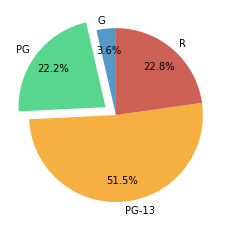

In [80]:
grp_pie_sum = rdf.groupby(['Rated'])['Box Office'].sum()
sum_sum = grp_pie_sum.sum()
sum_per = (grp_pie_sum/sum_sum)*100
colors = ['#5499C7','#58D68D','#F5B041','#CD6155']
explode = (0, 0.15, 0, 0)
plt.pie(sum_per, labels = labels, startangle=90, autopct='%1.1f%%', colors = colors, explode= explode, pctdistance = .75)
plt.show()

In [81]:
performance = (sum_per/count_per) * 100
performance

Rated
G        155.577336
PG       150.425580
PG-13    126.390120
R         53.903739
Name: Box Office, dtype: float64

In [82]:
year_sum = rdf.groupby(['release_year'])['Box Office'].sum()
year_count = rdf.groupby(['release_year'])['Box Office'].count()

In [83]:
grp_sum = rdf.groupby(['release_year','Rated'])['Box Office'].sum()
grp_sum_per = (grp_sum/year_sum)*100
grp_sum_per= grp_sum_per.reset_index()
grp_sum_per.head()

,release_year,Rated,Box Office
0,2000,G,5.237464
1,2000,PG,18.221840
2,2000,PG-13,56.461420
3,2000,R,20.079277
4,2001,G,4.693782


In [84]:
grp_count = rdf.groupby(['release_year','Rated'])['Box Office'].count()
grp_count_per = (grp_count/year_count)*100
grp_count_per = grp_count_per.reset_index()
grp_count_per.head()

,release_year,Rated,Box Office
0,2000,G,3.333333
1,2000,PG,8.333333
2,2000,PG-13,38.333333
3,2000,R,50.000000
4,2001,G,3.225806


In [85]:
g_count = grp_count_per.loc[grp_count_per['Rated'] == 'G']
pg_count = grp_count_per.loc[grp_count_per['Rated'] == 'PG']
pg13_count = grp_count_per.loc[grp_count_per['Rated'] == 'PG-13']
r_count = grp_count_per.loc[grp_count_per['Rated'] == 'R']

g_sum = grp_sum_per.loc[grp_sum_per['Rated'] == 'G']
pg_sum = grp_sum_per.loc[grp_sum_per['Rated'] == 'PG']
pg13_sum = grp_sum_per.loc[grp_sum_per['Rated'] == 'PG-13']
r_sum = grp_sum_per.loc[grp_sum_per['Rated'] == 'R']

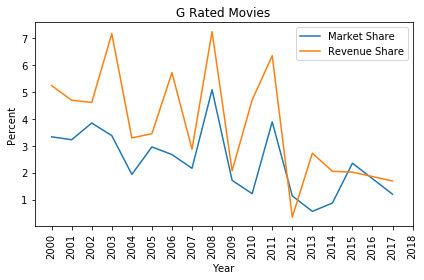

In [73]:
plt.plot(g_count['release_year'],g_count['Box Office'], label = 'Market Share')
plt.plot(g_sum['release_year'],g_sum['Box Office'], label = 'Revenue Share')
plt.ylabel('Percent')
plt.xlabel('Year')
plt.title('G Rated Movies')
plt.legend()
plt.xticks(years, labels = years_s, rotation='vertical')
plt.tight_layout()
plt.show()

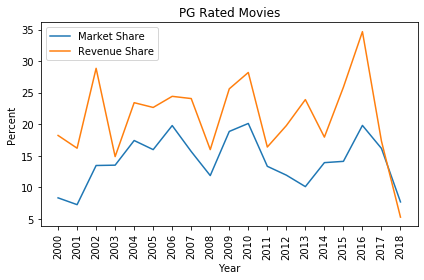

In [74]:
plt.plot(pg_count['release_year'],pg_count['Box Office'], label = 'Market Share')
plt.plot(pg_sum['release_year'],pg_sum['Box Office'], label = 'Revenue Share')
plt.ylabel('Percent')
plt.xlabel('Year')
plt.title('PG Rated Movies')
plt.legend()
plt.xticks(years, labels = years_s, rotation='vertical')
plt.tight_layout()
plt.show()

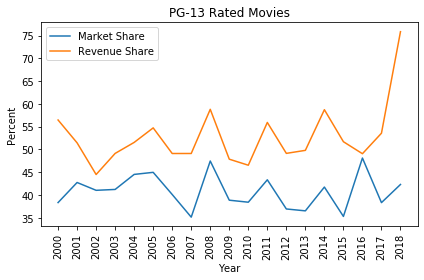

In [86]:
plt.plot(pg13_count['release_year'],pg13_count['Box Office'], label = 'Market Share')
plt.plot(pg13_sum['release_year'],pg13_sum['Box Office'], label = 'Revenue Share')
plt.ylabel('Percent')
plt.xlabel('Year')
plt.title('PG-13 Rated Movies')
plt.legend()
plt.xticks(years, labels = years_s, rotation='vertical')
plt.tight_layout()
plt.show()

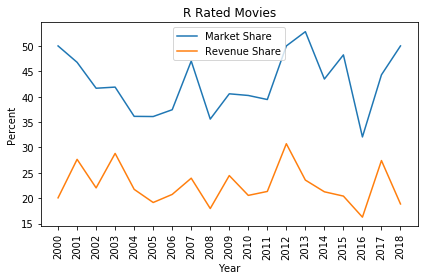

In [72]:
plt.plot(r_count['release_year'],r_count['Box Office'], label = 'Market Share')
plt.plot(r_sum['release_year'],r_sum['Box Office'], label = 'Revenue Share')
plt.ylabel('Percent')
plt.xlabel('Year')
plt.title('R Rated Movies')
plt.legend()
plt.xticks(years, labels = years_s, rotation='vertical')
plt.tight_layout()
plt.show()

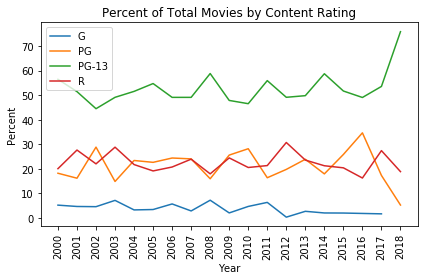

In [87]:
g_sum = grp_sum_per.loc[grp_sum_per['Rated'] == 'G']
pg_sum = grp_sum_per.loc[grp_sum_per['Rated'] == 'PG']
pg13_sum = grp_sum_per.loc[grp_sum_per['Rated'] == 'PG-13']
r_sum = grp_sum_per.loc[grp_sum_per['Rated'] == 'R']

plt.plot(g_sum['release_year'],g_sum['Box Office'], label = 'G')
plt.plot(pg_sum['release_year'],pg_sum['Box Office'], label = 'PG')
plt.plot(pg13_sum['release_year'],pg13_sum['Box Office'], label = 'PG-13')
plt.plot(r_sum['release_year'],r_sum['Box Office'], label = 'R')
plt.xticks(years, labels = years_s, rotation='vertical')
plt.ylabel('Percent')
plt.xlabel('Year')
plt.title('Percent of Total Movies by Content Rating')
plt.tight_layout()
plt.legend()
plt.show()

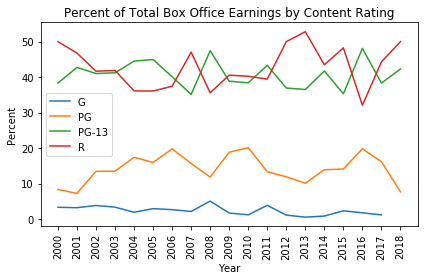

In [88]:
plt.plot(g_count['release_year'],g_count['Box Office'],label='G')
plt.plot(pg_count['release_year'],pg_count['Box Office'], label = 'PG')
plt.plot(pg13_count['release_year'],pg13_count['Box Office'], label = 'PG-13')
plt.plot(r_count['release_year'],r_count['Box Office'], label = 'R')
plt.xticks(years, labels = years_s, rotation='vertical')
plt.ylabel('Percent')
plt.xlabel('Year')
plt.title('Percent of Total Box Office Earnings by Content Rating')
plt.tight_layout()
plt.legend()
plt.show()